## Задача: Бренды хотят запустить программу лояльности и для лояльных пользователей выдать новые условия (скидочные карты и т.д.)
## Суть: Найти лояльных пользователей

### 1. Импорт необходимых библиотек

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Загрузка датасета

In [3]:
df = pd.read_csv('lesson_3_data__1_.csv', encoding='windows-1251')

In [4]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [5]:
df.shape

(48129, 21)

In [6]:
user_df = df[['tc', 'art_sp']]

In [7]:
user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [8]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp' :'brand_info'})

In [9]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


#### 3. Preprocessing (Предварительная обработка)

In [10]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [11]:
brand_name.split(' ')[-1]

'Store_Brand'

In [12]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]
#  функция возвращает последний элемент из brand_name

In [13]:
# user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# более компактный способ получить имя бренда

In [14]:
user_df.brand_info.apply(split_brand)

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [15]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [16]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


### 4. Решение аналитической задачи
**Гипотеза:** В данных о покупках, есть ***лояльные*** пользователи, то есть человек скорее покупает один и тот же бренд, а не каждый раз разный.
**Суть:** Тем пользователям, которые демонстрируют ***лояльность*** можно выдать **"карту золотого покупателя"**

### Разведывательный анализ данных

In [17]:
user_purchases = (user_df.groupby('user_id', as_index=False)
                  .agg({'brand_name': 'count'})
                  .rename(columns={'brand_name': 'purchases'})
                  .query('purchases >= 5'))

In [18]:
user_purchases.head()  # Число покупок, который совершил пользователь, если количество покупок >= 5

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [19]:
user_purchases.purchases.describe()

count    3383.000000
mean        9.320130
std         5.623993
min         5.000000
25%         6.000000
50%         7.000000
75%        11.000000
max        60.000000
Name: purchases, dtype: float64

#### Найти любимый бренд для каждого пользователя

In [20]:
lovely_brand_purchases_df = (user_df.groupby(['user_id', 'brand_name'], as_index=False)
 .agg({'brand_info': 'count'})
 .sort_values(['user_id', 'brand_info'], ascending=[True, False])
 .groupby('user_id').head(1)
 .rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'}))

In [21]:
lovely_brand_purchases_df.head()  # ДФ, где указано количество покупок любимого(больше всего покупок) бренда

,user_id,lovely_brand,lovely_brand_purchases
0,-1236394515,Brand_4,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
5,17311,Brand_4,2
6,17312,Brand_1,1


In [22]:
user_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [23]:
users_unique_brands = (user_df.groupby('user_id', as_index=False)
 .agg({'brand_name': pd.Series.nunique})
.rename(columns={'brand_name': 'unique_brands'}))

In [24]:
users_unique_brands  # Количество покупок УНИКАЛЬНЫХ брендов у пользователей

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [25]:
x = pd.Series([1, 2, 3])

In [26]:
x.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

#### Итого:

**Сколько ВСЕГО покупок** делают пользователи, если брать пользователей, число покупок у которых **БОЛЬШЕ или РАВНО 5**

In [27]:
user_purchases = (user_df.groupby('user_id', as_index=False)
                  .agg({'brand_name': 'count'})
                  .rename(columns={'brand_name': 'purchases'})
                  .query('purchases >= 5'))

**Число УНИКАЛЬНЫХ брендов** в покупках пользователя

In [28]:
users_unique_brands = (user_df.groupby('user_id', as_index=False)
 .agg({'brand_name': pd.Series.nunique})
.rename(columns={'brand_name': 'unique_brands'}))

**Сколько покупок** приходится на **ЛЮБИМЫЙ БРЕНД** пользователя

In [29]:
lovely_brand_purchases_df = (user_df.groupby(['user_id', 'brand_name'], as_index=False)
 .agg({'brand_info': 'count'})
 .sort_values(['user_id', 'brand_info'], ascending=[True, False])
 .groupby('user_id').head(1)
 .rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'}))

In [30]:
user_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [31]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [32]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
0,-1236394515,Brand_4,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
5,17311,Brand_4,2
6,17312,Brand_1,1


#### Слияние полученных Датафреймов (MERGE)

In [33]:
loyalty_df = (user_purchases.merge(users_unique_brands, on='user_id')
 .merge(lovely_brand_purchases_df, on='user_id'))
# По дефолту слияние - INNER JOIN (общие значения)

In [34]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [35]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [36]:
loyal_users  # Пользователи, которые покупают только один бренд

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [42]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases
# Добавление колонки оценки лояльности, количество покупок любимого бренда / все покупки

In [38]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


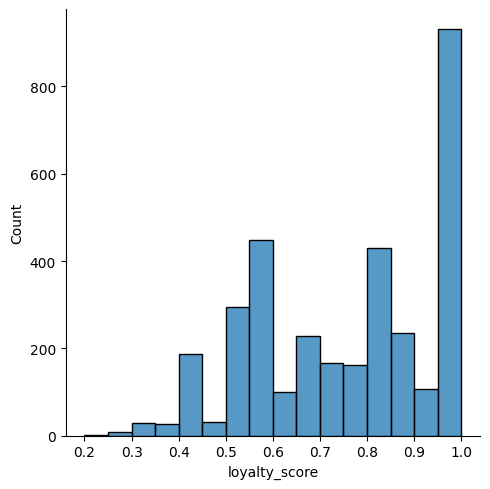

In [39]:
ax = sns.displot(loyalty_df.loyalty_score);

In [40]:
loyalty_df.loyalty_score.median()  # Медиана оценки лояльности

0.8

In [55]:
brand_loyalty = (loyalty_df.groupby('lovely_brand', as_index=False)
                 .agg({'loyalty_score': 'median', 'user_id': 'count'})
                 .sort_values(by='loyalty_score', ascending=False))
# ДФ с оценками лояльности всех брендов

In [56]:
brand_loyalty

,lovely_brand,loyalty_score,user_id
3,Brand_4,0.818182,2041
6,Store_Brand,0.750000,715
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
4,Brand_5,0.600000,5
2,Brand_3,0.500000,115
5,Brand_7,0.444444,9


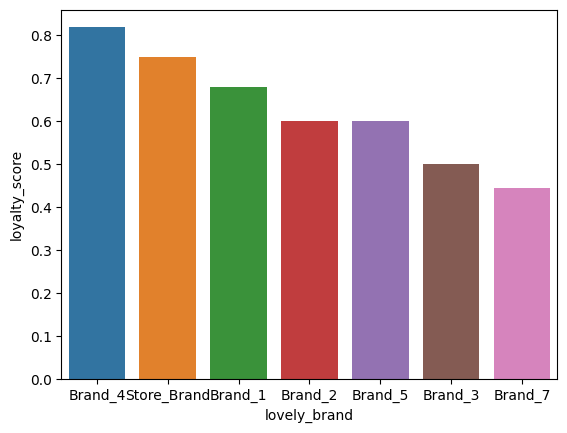

In [57]:
ax2 = sns.barplot(data=brand_loyalty, x='lovely_brand', y='loyalty_score')

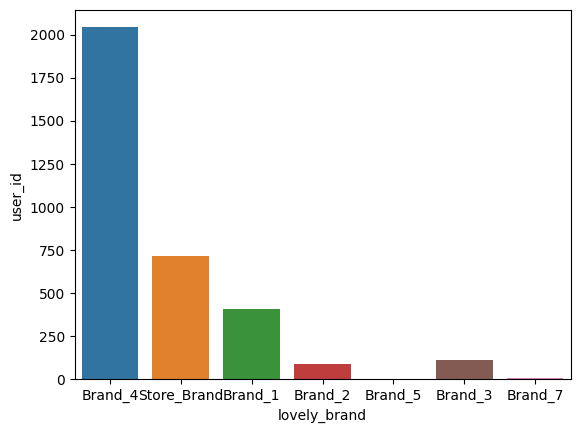

In [58]:
ax3 = sns.barplot(data=brand_loyalty, x='lovely_brand', y='user_id')